<section style="direction: rtl; text-align: justify; margin: 30px;">

## مقدمه

سیستم نظارت بر عوامل مخاطرات رفتاری (BRFSS) یک نظرسنجی تلفنی مربوط به سلامت است که سالانه توسط مرکز کنترل و پیشگیری از بیماری‌ها در آمریکا جمع‌آوری می‌شود. هر سال، این نظرسنجی پاسخ‌های بیش از ۴۰۰،۰۰۰ آمریکایی را در مورد رفتارهای خطرناک سلامت، بیماری‌های مزمن و استفاده از خدمات پیشگیری جمع‌آوری می‌کند. این نظرسنجی هر ساله از سال ۱۹۸۴ برگزار می‌شود. نتایج این نظرسنجی در سال 2015 در فایلی با فرمت csv در دسترس است. این مجموعه داده اصلی شامل پاسخ‌های ۴۴۱،۴۵۵ پرسش‌شونده و ۳۳۰ ویژگی است. این ویژگی‌ها یا به‌صورت مستقیم از شرکت‌کنندگان پرسیده شده‌اند و یا متغیرهای محاسبه‌شده بر اساس پاسخ‌های شرکت‌کنندگان فردی هستند.
جدول زیر داده‌ی تمیز شده شامل 21 ویژگی و ۲۵۳،۸۶۰ ردیف از پاسخ‌های افراد به نظرسنجی BRFSS در سال 2015 است. متغیر هدف (Diabetes_012)  در این داده از سه کلاس تشکیل شده است:  
  
  
1.	عدم ابتلا به دیابت و یا دیابت در دوران بارداری  (0)  
2.	پیش دیابت  (1)  
3.	دیابت  (2)  

</section>

***

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **مرحله اول**
### **اضافه کردن کتابخانه‌های لازم**

</section>

In [2]:
import os #working with the operating system, handling files, directories, and system-related tasks.
from collections import Counter #provides special data structures like counters, default dictionaries, and named tuples.
import matplotlib.pyplot as plt #used for creating visual and graphical plots.
import numpy as np #used for numerical computations and working with arrays and matrices efficiently.
import pandas as pd #used for data manipulation and analysis, providing tools to efficiently work with structured data like data frames and series.
import seaborn as sns #creating statistical data visualizations that are aesthetically pleasing and informative, built on top of Matplotlib.
import sklearn #machine learning tasks, providing tools for classification, regression, clustering, and more, along with utilities for data preprocessing and model evaluation.
from imblearn.combine import SMOTETomek #for oversampling, undersampling, and generating synthetic data to improve model performance on imbalanced data.
from imblearn.over_sampling import SMOTE #is an oversampling technique used to address class imbalance in machine learning datasets.
from scipy.stats import randint, uniform #scientific and technical computing, providing a wide range of functions and tools for optimization, integration, interpolation, linear algebra, statistics, and more.
from sklearn import datasets
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import (
    Lasso, #is a regression technique used in machine learning and statistics.
    LinearRegression, #is a fundamental machine learning algorithm used for modeling the relationship between a dependent variable and one or more independent variables by fitting a linear equation to the observed data.
    LogisticRegression, # is a classification algorithm used in machine learning and statistics.
    Ridge, #also known as Tikhonov regularization, is a linear regression technique that adds a regularization term to the cost function
    SGDClassifier, #stands for Stochastic Gradient Descent Classifier. It's a machine learning algorithm
)

"""The `sklearn.metrics` module in scikit-learn is used 
for evaluating the performance of machine learning models.
It provides a variety of functions to compute metrics like 
accuracy, precision, recall, F1-score, and more.
These metrics help assess the quality and effectiveness of models for
classification, regression, and clustering tasks."""
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    mean_squared_error,
    r2_score,make_scorer,
    precision_score,recall_score,
    roc_auc_score
)

"""used for model selection and hyperparameter tuning.
It provides tools for splitting datasets into training and
testing sets, performing cross-validation, and searching for
the best hyperparameters through techniques like grid search and
randomized search.
This module helps optimize model performance and generalization on new data."""
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    train_test_split,
)

"""used for building and training neural network models.
It provides a simple interface to create multi-layer perceptrons (MLPs) for
both regression and classification tasks.
While scikit-learn's neural network capabilities
are not as extensive as dedicated deep learning libraries,
it offers a convenient way to start with neural networks in a familiar scikit-learn environment."""
from sklearn.neural_network import MLPClassifier

"""used for data preprocessing tasks.
It provides functions and classes to transform and preprocess input data
before using it to train or test machine learning models.
This includes scaling, normalization, encoding categorical variables,
imputing missing values, and more.
The module ensures that the data is in a suitable format for
training and improves model performance."""
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    StandardScaler,
    minmax_scale,
)


from sklearn.svm import SVC #used for Support Vector Machine (SVM) algorithms. SVMs are versatile machine learning models used for classification and regression tasks.
from sklearn.tree import DecisionTreeClassifier #used for decision tree-based algorithms. It provides tools for building, visualizing, and applying decision tree models for classification and regression tasks. 
from xgboost import XGBClassifier #It's designed for improved performance and scalability and is particularly well-suited for structured/tabular data. 
from sklearn.ensemble import GradientBoostingClassifier #used for ensemble learning methods, which combine multiple individual models to create a stronger overall predictive model.
from sklearn.naive_bayes import GaussianNB #used for implementing Naive Bayes algorithms, a family of probabilistic classification methods based on Bayes' theorem.
from sklearn.neighbors import KNeighborsClassifier #used for working with nearest neighbor-based algorithms. It includes tools for creating models like K-Nearest Neighbors (KNN) for classification and regression tasks.

***

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **مرحله دوم**
### **خواندن داده‌ها**

</section>

In [2]:
import os
import pandas as pd

folder_name = "src"
file_name = "diabetes.csv"
absolute_path = os.path.join(folder_name, file_name)

# خواندن فایل CSV با استفاده از مسیر مطلق
with open(absolute_path, "r") as file:
    df = pd.read_csv(file)

# چاپ مسیر مطلق فایل
print(f"Absolute path: {absolute_path}")

# چاپ ابعاد دیتاست
print("Dataset shape:", df.shape)


Absolute path: src/diabetes.csv
Dataset shape: (253680, 22)


<section style="direction: rtl; text-align: justify; margin: 30px;">

## **راهنمای داده‌ها**


| **نام ویژگی**                | **عنوان فارسی**                              |
|-------------------------------|----------------------------------------------|
| **Diabetes_012**              | دیابت (0: بدون دیابت، 1: دیابت نوع 1، 2: دیابت نوع 2) |
| **HighBP**                    | فشار خون بالا                                |
| **HighChol**                  | کلسترول بالا                                 |
| **CholCheck**                 | بررسی کلسترول                                |
| **BMI**                       | شاخص توده بدنی (BMI)                         |
| **Smoker**                    | سیگار کشیدن                                  |
| **Stroke**                    | سکته مغزی                                    |
| **HeartDiseaseorAttack**      | بیماری قلبی یا حمله قلبی                     |
| **PhysActivity**              | فعالیت بدنی                                  |
| **Fruits**                    | مصرف میوه                                    |
| **Veggies**                   | مصرف سبزیجات                                 |
| **HvyAlcoholConsump**         | مصرف زیاد الکل                               |
| **AnyHealthcare**             | دریافت هر نوع مراقبت‌های بهداشتی             |
| **NoDocbcCost**               | عدم مراجعه به پزشک به دلیل هزینه             |
| **GenHlth**                   | سلامت عمومی                                  |
| **MentHlth**                  | سلامت روان                                   |
| **PhysHlth**                  | سلامت جسمانی                                 |
| **DiffWalk**                  | مشکل در راه رفتن                             |
| **Sex**                       | جنسیت                                        |
| **Age**                       | سن                                           |
| **Education**                 | سطح تحصیلات                                  |
| **Income**                    | سطح درآمد                                    |

</section>

***

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **بررسی داده‌ها**

</section>

In [3]:
# محاسبه تعداد و درصد داده‌های گمشده
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

# ایجاد DataFrame برای نمایش جامع‌تر
missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage': missing_percentage
})

# فیلتر کردن ستون‌هایی که داده‌های گمشده دارند و مرتب‌سازی بر اساس درصد
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]
missing_summary = missing_summary.sort_values(by='Percentage', ascending=False)

# نمایش خلاصه داده‌ها
print(missing_summary)
print("--------------------------")
print(missing_data)


Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []
--------------------------
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


<section style="direction: rtl; text-align: justify; margin: 30px;">

این خروجی نشان می‌دهد که هیچ یک از ستون‌های DataFrame حاوی مقادیر گمشده (missing values) نیستند. در واقع، همه ستون‌ها دارای صفر مقدار گمشده هستند، به این معنا که تمامی داده‌ها در همه ستون‌ها به طور کامل و بدون هیچ نقصی ثبت شده‌اند. این نتیجه به ما اطمینان می‌دهد که نیازی به انجام فرآیندهای جبرانی برای مقادیر گمشده مانند جایگزینی، حذف یا پیش‌بینی مقادیر گمشده در این مجموعه داده نیست و می‌توانیم با اطمینان بیشتری به مراحل بعدی پیش‌پردازش و تحلیل داده‌ها بپردازیم. 

وجود مقادیر کامل داده‌ها همچنین به ما کمک می‌کند که با دقت بیشتری مدل‌های یادگیری ماشین را آموزش دهیم، چرا که داده‌های ناقص می‌توانند منجر به کاهش دقت و عملکرد مدل‌ها شوند. به طور کلی، این خروجی یک وضعیت مطلوب و مفید برای تحلیل‌گران داده است.

</section>

***

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **مرحله چهارم**

### **نحوه توزیع متغیر هدف**

در این قسمت توزیع متغیر هدف خود را بررسی می کنیم. یعنی توزیع افراد سالم، افراد پیش دیابت و افراد دیابتی چگونه است. سپس این افراد را در محدوده 0 تا 1 نرمالایز می کنم.

این نسخه بهبودیافته از کد به ترتیب زیر عمل می‌کند:

1. **خط 2-3:** 
   - مقدار فراوانی (تعداد) هر برچسب (0، 1، 2) در ستون `Diabetes_012` محاسبه و در متغیری به نام `frequency` ذخیره می‌شود.
   - توزیع درصدی هر برچسب (نسبت هر مقدار به کل داده‌ها) نیز محاسبه و در متغیری به نام `distribution` ذخیره می‌شود.

2. **خط 6:**
   - چاپ یک متن توضیحی که به کاربر اطلاع می‌دهد که فراوانی هر برچسب در ستون `Diabetes_012` قرار است نمایش داده شود.
   - سپس، متغیر `frequency` که حاوی تعداد تکرار هر برچسب است، چاپ می‌شود.

3. **خط 7:**
   - چاپ یک متن توضیحی که به کاربر اطلاع می‌دهد که توزیع درصدی مقادیر مختلف در ستون `Diabetes_012` قرار است نمایش داده شود.
   - سپس، متغیر `distribution` که حاوی درصد هر برچسب نسبت به کل رکوردها است، چاپ می‌شود.

4. **خط 8:**
   - چاپ یک متن توضیحی که به کاربر اطلاع می‌دهد که لیست کامل ستون‌های دیتاست نمایش داده خواهد شد.
   - سپس، نام تمام ستون‌های دیتاست با استفاده از `df.columns` چاپ می‌شود.

**به طور خلاصه:** این کد ابتدا فراوانی و توزیع درصدی مقادیر ستون `Diabetes_012` را محاسبه کرده و سپس آن‌ها را همراه با نام تمام ستون‌های دیتاست چاپ می‌کند. این نسخه کد، به دلیل ذخیره نتایج محاسبات در متغیرهای موقت (`frequency` و `distribution`) از تکرار محاسبات جلوگیری می‌کند و کد را خواناتر می‌سازد.

</section>

In [4]:
# تعریف متغیرها برای فراوانی و توزیع درصدی
frequency = df.Diabetes_012.value_counts()
distribution = df.Diabetes_012.value_counts(normalize=True)

# چاپ نتایج
print("\nFrequency of each label value:\n", frequency)
print("\nDistribution of the target:\n", distribution)
print("\nFeatures:\n", df.columns)


Frequency of each label value:
 Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
 Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
 Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


<section style="direction: rtl; text-align: justify; margin: 30px;">

این خروجی اطلاعات کلیدی در مورد توزیع مقادیر ستون `Diabetes_012` و ویژگی‌های دیتاست ما ارائه می‌دهد:

1. **فراوانی مقادیر (`Frequency of each label value`):**
   - تعداد رکوردهای مربوط به هر مقدار در ستون `Diabetes_012` نشان داده شده است:
     - **0.0:** 213,703 رکورد (بدون دیابت)
     - **2.0:** 35,346 رکورد (دیابت نوع 2)
     - **1.0:** 4,631 رکورد (دیابت نوع 1)
   - این آمار نشان می‌دهد که بیشتر داده‌ها مربوط به افرادی است که دیابت ندارند (0.0).

2. **توزیع درصدی مقادیر (`Distribution of the target`):**
   - نسبت هر مقدار نسبت به کل رکوردها نمایش داده شده است:
     - **0.0:** 84.24% از کل داده‌ها (بدون دیابت)
     - **2.0:** 13.93% از کل داده‌ها (دیابت نوع 2)
     - **1.0:** 1.83% از کل داده‌ها (دیابت نوع 1)
   - این آمار نشان می‌دهد که درصد بسیار بالایی از داده‌ها به افراد بدون دیابت تعلق دارد و درصد کمی از افراد به دیابت نوع 1 مبتلا هستند.

3. **ویژگی‌ها (`Features`):**
   - لیستی از نام تمام ستون‌های دیتاست را نمایش می‌دهد. این ویژگی‌ها شامل متغیرهای مختلفی مانند فشار خون بالا (`HighBP`)، شاخص توده بدنی (`BMI`)، سیگار کشیدن (`Smoker`)، فعالیت بدنی (`PhysActivity`) و غیره است.

**نتیجه‌گیری کلی:**  
این خروجی نشان می‌دهد که در دیتاست ما، بیشتر رکوردها به افراد بدون دیابت تعلق دارند. همچنین، این خروجی اطلاعاتی در مورد توزیع مقادیر دیابت و نام ویژگی‌های مختلف در دیتاست ارائه می‌دهد که برای تحلیل‌های بیشتر مفید است.

</section>

***

<section style="direction: rtl; text-align: justify; margin: 30px;">

## **مرحله پنجم**

### **تبدیل داده‌ها به نوع باینری**

1. **خط 2:**
   - ستون `Diabetes_012` را انتخاب می‌کند و تمام مقادیر `2.0` را با `1.0` جایگزین می‌کند. این عملیات ستون را به یک متغیر باینری تبدیل می‌کند که شامل دو مقدار `0.0` (عدم وجود دیابت) و `1.0` (وجود دیابت، شامل هر دو نوع 1 و 2) می‌شود.

2. **خط 5:**
   - توزیع درصدی مقادیر جدید (باینری) در ستون `Diabetes_012` را محاسبه و چاپ می‌کند. با استفاده از `normalize=True`، نسبت هر مقدار به کل داده‌ها نمایش داده می‌شود. این خروجی به شما نشان می‌دهد که چند درصد از داده‌ها به هر یک از مقادیر `0.0` و `1.0` تعلق دارند.

3. **خط 8:**
   - نام تمام ستون‌های دیتاست را بررسی می‌کند و هرگونه فاصله‌ی اضافی در ابتدا و انتهای نام ستون‌ها را حذف می‌کند (با استفاده از `str.strip()`).
   - سپس، تمام فاصله‌های داخلی در نام ستون‌ها را با رشته‌ی خالی جایگزین می‌کند (با استفاده از `str.replace(" ", "")`). این کار نام ستون‌ها را تمیز و منظم می‌کند و ممکن است در زمان استفاده از کدهای دیگر مفید باشد.
   
</section>

In [6]:
# تبدیل مقادیر 2.0 به 1.0 در ستون Diabetes_012
df.loc[:, 'Diabetes_012'] = df['Diabetes_012'].replace(2.0, 1.0)

# چاپ توزیع درصدی مقادیر باینری پس از جایگزینی
print(df['Diabetes_012'].value_counts(normalize=True))

# حذف فاصله‌ها از نام ستون‌ها
df.columns = df.columns.str.strip().str.replace(" ", "")

Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64


<section style="direction: rtl; text-align: justify; margin: 30px;">

این خروجی نشان می‌دهد که پس از تبدیل مقادیر `2.0` به `1.0` در ستون `Diabetes_012`، داده‌های ما اکنون به دو کلاس باینری تقسیم شده‌اند:

- **0.0:** 84.24% از داده‌ها به افرادی اختصاص دارد که دیابت ندارند.
- **1.0:** 15.76% از داده‌ها به افرادی اختصاص دارد که دیابت دارند (شامل هر دو نوع 1 و 2).

### تحلیل مختصر:
این خروجی نشان می‌دهد که اکثر داده‌ها (بیش از 84%) به افرادی مربوط می‌شود که دیابت ندارند. تنها حدود 16% از داده‌ها به افرادی تعلق دارد که دیابت دارند، که این نسبت پس از ادغام داده‌های مربوط به دیابت نوع 1 و 2 به دست آمده است.

این توزیع می‌تواند نشان‌دهنده‌ی عدم توازن (class imbalance) در داده‌ها باشد، که در مراحل بعدی تحلیل یا مدلسازی می‌تواند تاثیرگذار باشد. به عنوان مثال، اگر قصد داشته باشیم یک مدل یادگیری ماشین بسازیم، باید به این عدم توازن توجه داشته باشیم و شاید نیاز به روش‌های خاصی مانند **oversampling** یا **undersampling** برای مدیریت این مسئله داشته باشیم.

</section>

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> Correlation - مرحله 5 </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             کد ارائه شده شامل ایجاد تجسم های مرتبط با همبستگی بین ویژگی ها و متغیر هدف در یک DataFrame است. کد دو نمودار تولید می کند: یک نمودار میله ای که همبستگی ویژگی های فردی را با متغیر هدف نشان می دهد، و یک نقشه حرارتی که ماتریس همبستگی همه ویژگی ها در DataFrame را نشان می دهد. این تجسم ها می توانند به ما در درک روابط بین ویژگی ها و متغیر هدف در مجموعه داده خود کمک کنند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

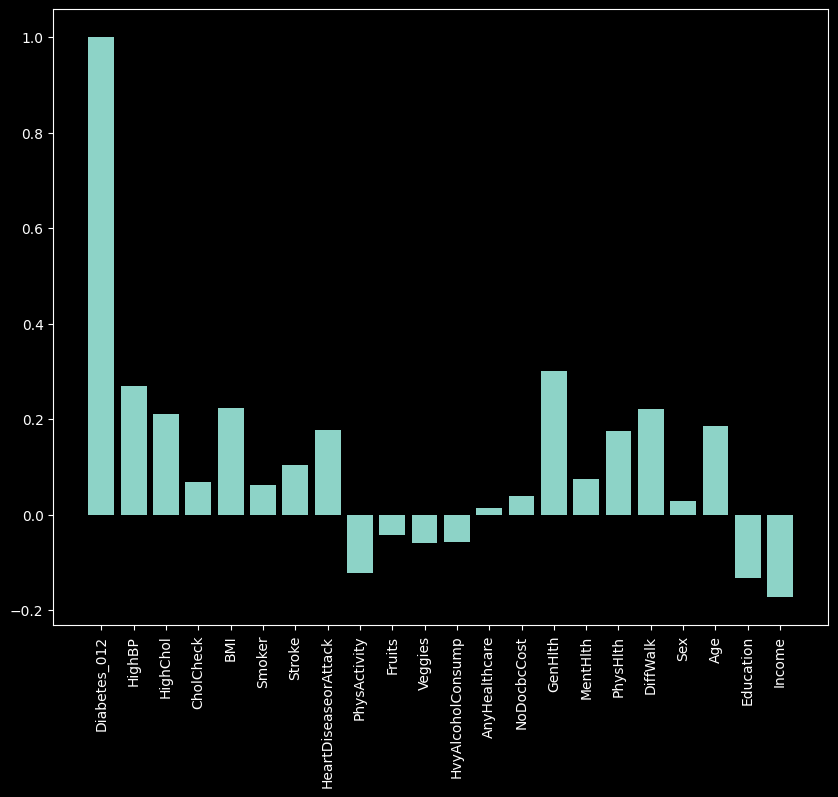

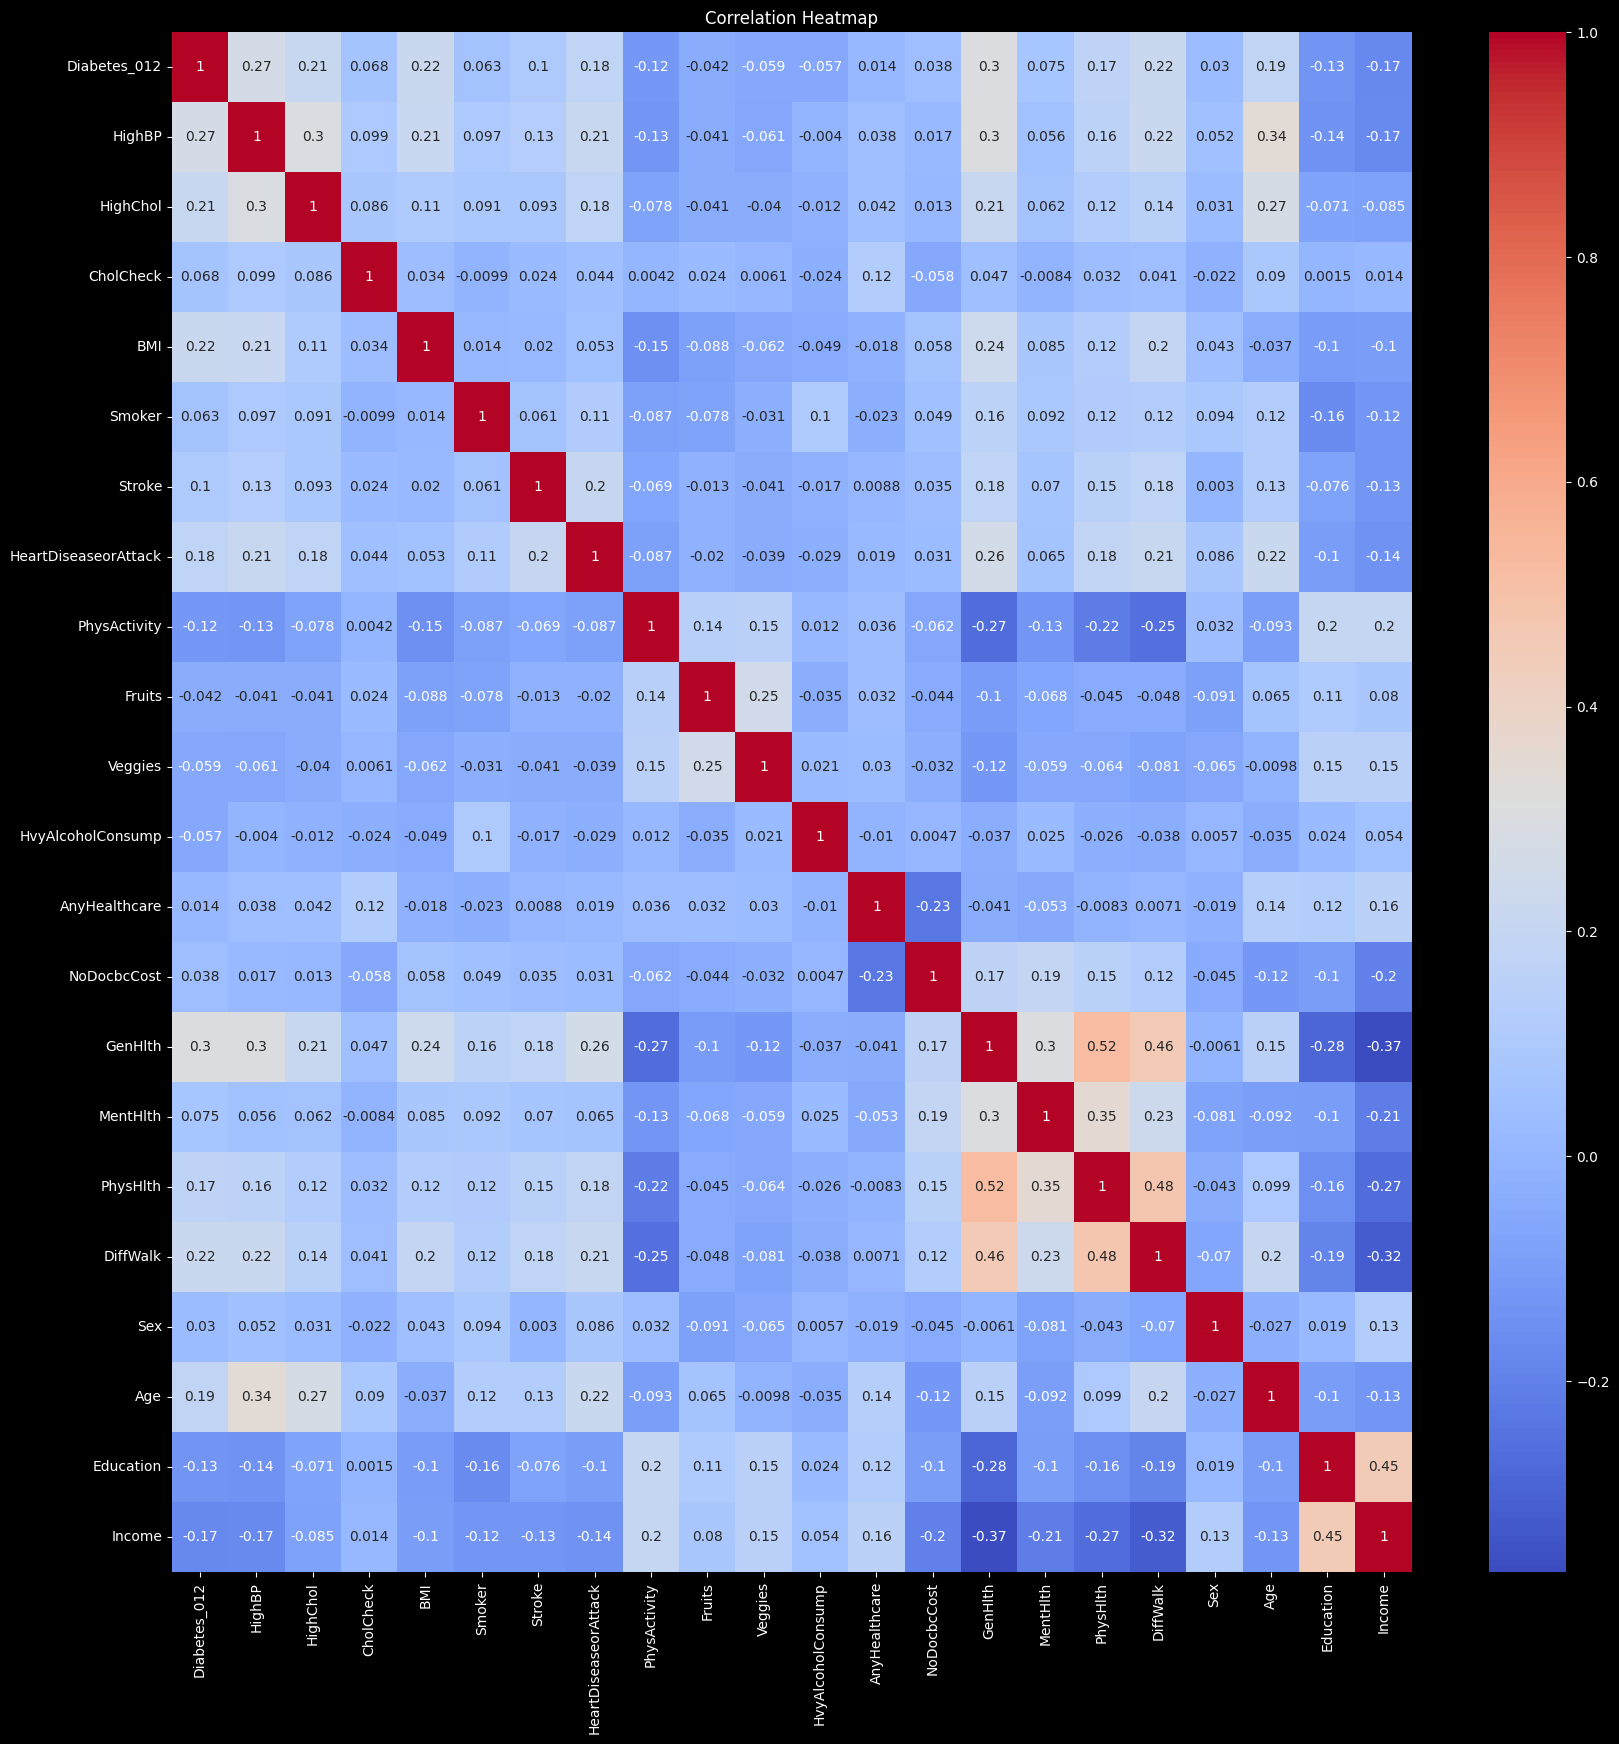

In [8]:
# Correlation

plt.figure(figsize=(10, 8))
df.corr("pearson")["Diabetes_012"]
fig2 = plt.bar(
    df.corr("pearson")["Diabetes_012"].index, df.corr("pearson")["Diabetes_012"]
)
plt.xticks(rotation=90)

plt.figure(figsize=(20, 20))
sns.heatmap(
    df[df.columns].corr(),
    annot=True,
    cmap="coolwarm",
)
plt.title("Correlation Heatmap")
plt.show()

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 7 - "آموزش" و "درآمد" چه ارتباطی با دیابت دارند؟ </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             به نظر می‌رسد که متغیرهای «مصرف میوه‌ها»، «مصرف سبزیجات»، «NoDocbcCost»، «آموزش»، «درآمد» کمترین همبستگی را با داده‌های ما داشته باشند. و داده های "آموزش و پرورش"، "درآمد" بی معنی به نظر می رسد. در حال حاضر، ما این مقادیر را از داده‌ها حذف می‌کنیم تا اهمیت آنها را بفهمیم و ببینیم که آیا مدل ما بدون این موارد عملکرد خوبی خواهد داشت یا خیر.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [8]:
df.drop(
    ["Fruits", "Veggies", "NoDocbcCost", "Education", "Income"], axis=1, inplace=True
)

print(df.shape)

(253680, 17)


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> چرا استاندارد سازی می‌کنیم؟ </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             استانداردسازی که به عنوان عادی سازی Score z نیز شناخته می شود، یک تکنیک پیش پردازش است که معمولاً در یادگیری ماشین و آمار استفاده می شود. این شامل تبدیل ویژگی های یک مجموعه داده به گونه ای است که آنها میانگین 0 و انحراف استاندارد 1 داشته باشند. در اینجا دلایلی را نشان می دهیم که چرا استانداردسازی مهم است:

<p class = "specialP"> 1. مقیاس های یکسان سازی:</p><p class = "markdown-container"> ویژگی های مختلف در یک مجموعه داده ممکن است مقیاس ها یا واحدهای اندازه گیری متفاوتی داشته باشند. برخی از الگوریتم‌ها به مقیاس ویژگی‌ها حساس هستند و این می‌تواند منجر به یادگیری جانبدارانه شود. استانداردسازی تضمین می‌کند که همه ویژگی‌ها مقیاس یکسانی دارند و فرآیند یادگیری را منصفانه‌تر می‌کند. </p>

<p class = "specialP"> 2. بهبود همگرایی: </p><p class = "markdown-container"> بسیاری از الگوریتم‌های بهینه‌سازی مورد استفاده در یادگیری ماشین کارآمدتر عمل می‌کنند و با استانداردسازی ویژگی‌ها سریع‌تر همگرا می‌شوند. این به ویژه برای روش‌های بهینه‌سازی مبتنی بر گرادیان مانند نزول گرادیان صادق است. </p>

<p class = "specialP"> 3. افزایش عملکرد مدل:</p><p class = "markdown-container"> برخی از الگوریتم‌های یادگیری ماشین، مانند ماشین‌های بردار پشتیبان (SVM) و k-nearest همسایه‌ها (KNN)، مبتنی بر فاصله هستند و می‌توانند تحت تأثیر ویژگی‌های با مقیاس‌های مختلف قرار گیرند. استاندارد کردن ویژگی ها به این الگوریتم ها کمک می کند تا بهتر کار کنند و نتایج دقیق تری تولید کنند.

<p class = "specialP"> 4. قابلیت تفسیر: </p><p class = "markdown-container"> استانداردسازی می تواند ضرایب یا مقادیر اهمیت ویژگی ها را قابل تفسیرتر کند. هنگامی که ویژگی ها مقیاس های متفاوتی دارند، ضرایب به دست آمده از مدل ها ممکن است مستقیماً تأثیر آنها را بر متغیر هدف منعکس نکنند.

<p class = "specialP"> 5. قاعده سازی: </p><p class = "markdown-container"> برخی از تکنیک های منظم سازی، مانند منظم سازی L1 و L2، فرض می کنند که همه ویژگی ها در یک مقیاس هستند. استانداردسازی به اعمال منظم سازی به طور موثر کمک می کند و از تسلط برخی ویژگی ها بر فرآیند یادگیری جلوگیری می کند.

<p class = "specialP"> 6. مدل هایی که نیاز به توزیع عادی دارند: </p><p class = "markdown-container"> برخی از الگوریتم ها، مانند رگرسیون خطی، فرض می کنند که ویژگی ها به طور معمول توزیع شده اند. استانداردسازی می تواند به دستیابی به توزیع نرمال تر در داده ها کمک کند.
             </p>            
        </th>
    </tr>
</table>

</br>

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> BMI مرحله 8 - تجزیه و تحلیل بر روی شاخص توده بدنی </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             ابتدا می بینیم که نمودار ما عادی به نظر می رسد اما وقتی به محدوده آن نگاه می کنیم مشخص است که از 10 تا 60 شروع می شود، می خواهیم میانگین آن صفر باشد. در اینجا با استفاده از تابع StandardScaler سعی می کنیم نمودار را به گونه ای نمایش دهیم که میانگین آن 0 و Standardize آن 1 شود. با این کار مرکز همه داده ها صفر می شود و پراکندگی آن به 1 می رسد. تفاوت را در نمودار دوم ببینید.
            کد با ایجاد یک هیستوگرام برای ستون "BMI" به شکل اصلی آن شروع می شود و سپس به اعمال مقیاس بندی استاندارد برای مقادیر "BMI" ادامه می دهد. دوباره یک هیستوگرام برای تجسم توزیع مقادیر "BMI" مقیاس شده ایجاد می کند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

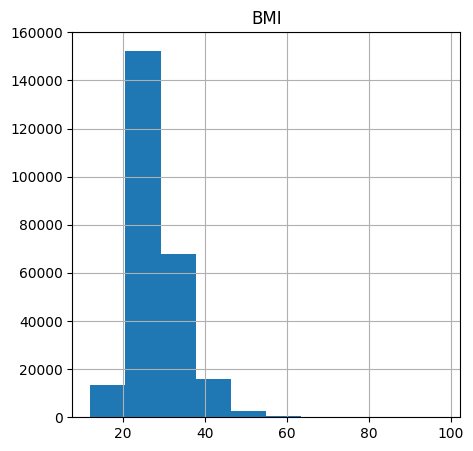

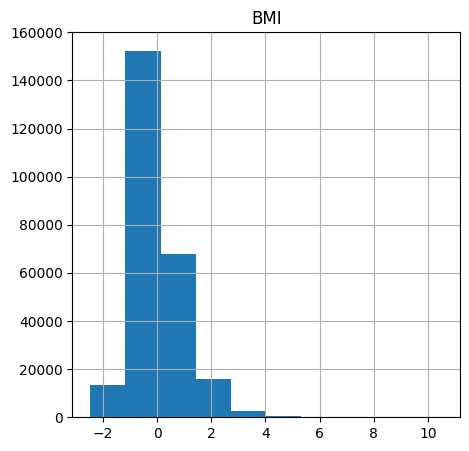

In [5]:
df.hist(column="BMI", figsize=(5, 5))
bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
fig = df.hist(column="BMI", figsize=(5, 5))

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px;
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<p class = "markdown-title"><b> GenHlth مرحله 9 - تجزیه و تحلیل بر روی شاخص سلامت عمومی </b></p>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

array([[<Axes: title={'center': 'GenHlth'}>]], dtype=object)

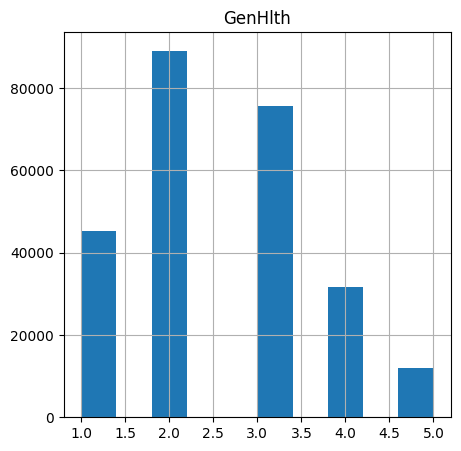

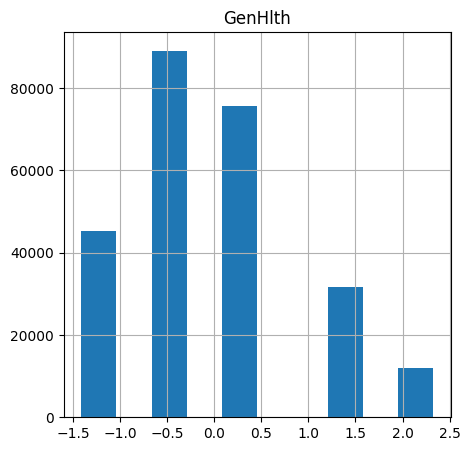

In [6]:
df.hist(column="GenHlth", figsize=(5, 5))
gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = gh_scaler.transform(df[cols_to_scale])
df.hist(column="GenHlth", figsize=(5, 5))

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px;
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<p class = "markdown-title"><b> MenHlth مرحله 10 - تجزیه و تحلیل بر روی شاخص سلامت روان </b></p>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

array([[<Axes: title={'center': 'MentHlth'}>]], dtype=object)

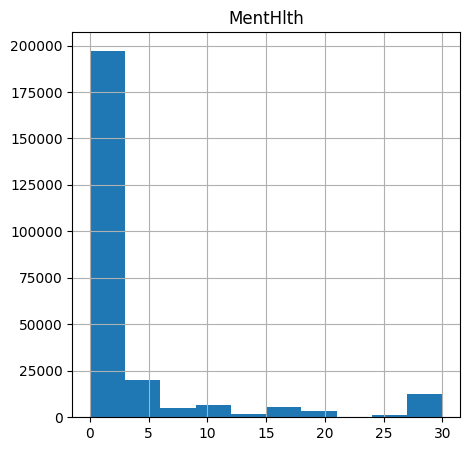

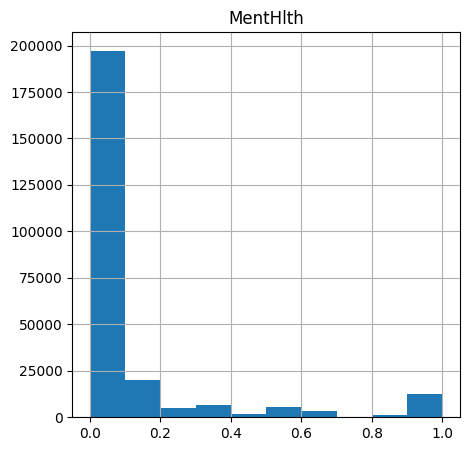

In [7]:
df.hist(column="MentHlth", figsize=(5, 5))
ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
df.hist(column="MentHlth", figsize=(5, 5))

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 200%;
        text-align: center;
        padding: 40px 0px 0px 5px;
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<p class = "markdown-title"><b> PhysHlth مرحله 11 - تجزیه و تحلیل بر روی شاخص بیماری جسمی </b></p>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

array([[<Axes: title={'center': 'PhysHlth'}>]], dtype=object)

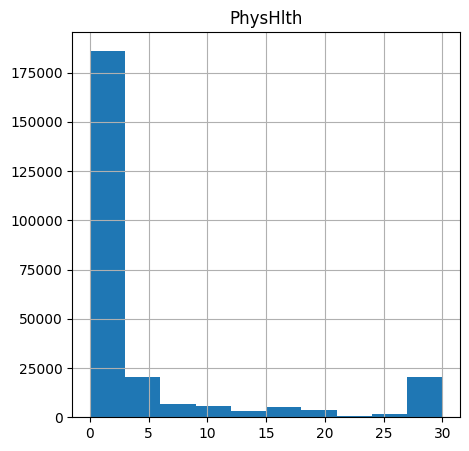

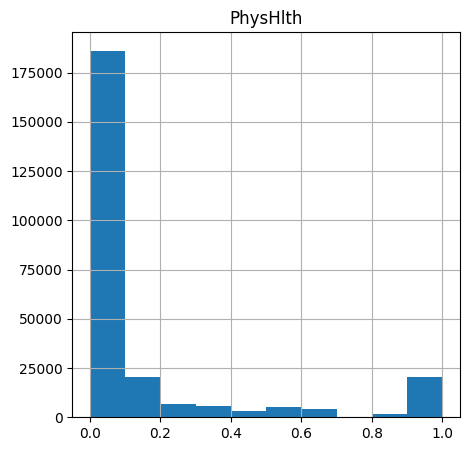

In [8]:
df.hist(column="PhysHlth", figsize=(5, 5))
phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
df.hist(column="PhysHlth", figsize=(5, 5))

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px;
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<p class = "markdown-title"><b> Age مرحله 12 - تجزیه و تحلیل بر روی شاخص سن </b></p>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

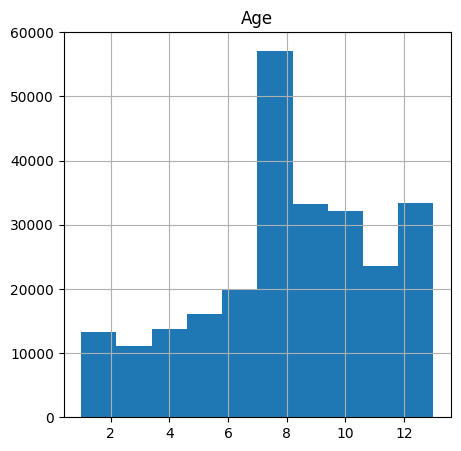

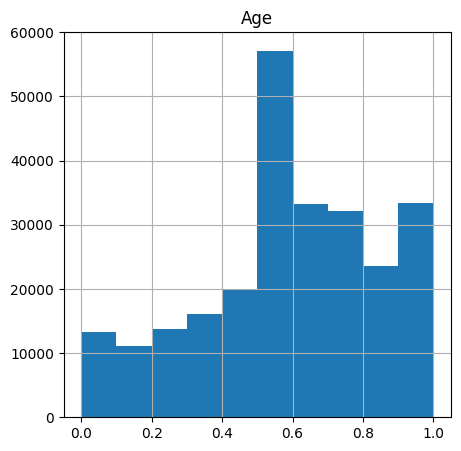

In [9]:
df.hist(column="Age", figsize=(5, 5))
age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
df.hist(column="Age", figsize=(5, 5))
import warnings
warnings.filterwarnings("ignore")

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 13 - آیا جنسیت در بیماری دیابت مهم است؟ </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در داده‌های ما، ستون جنسیت حدود 10 درصد تفاوت جمعیت بین مردان و زنان دارد که ممکن است بر محاسبات ما تأثیر بگذارد. یعنی اگر جنسیت مرد باشد با 10 درصد شانس بیشتر می توانیم تشخیص دهیم که فرد دیابت دارد یا خیر و یادگیری مدل ما بهتر است. به همین دلیل بهتر است دو ستون مجزا برای خانم ها و آقایان ایجاد کنیم. بنابراین در نهایت ممکن است متوجه شویم که عامل زن و مرد در یادگیری مدل ما موثر است. ما علاقه مندیم که این تفاوت را جداگانه ببینیم.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [10]:
df["Sex"].value_counts(normalize=True)

Sex
0.0    0.559658
1.0    0.440342
Name: proportion, dtype: float64

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 14 - جداسازی ستون جنسیت </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             کد زیر مقدار ستون جنسیت را دریافت کرده و با استفاده از تابع OneHotEncoder آن را به دو ویژگی جدید تبدیل می کند و در نهایت، ستون های جدید را به داده های اصلی اضافه می کنیم. (gender_0.0, gender_1.0)
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [11]:
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded

[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,gender_0.0,gender_1.0
0,0.0,1.0,1.0,1.0,1.757936,1.0,0.0,0.0,0.0,0.0,...,0.0,2.329121,0.6,0.500000,1.0,0.666667,4.0,3.0,1.0,0.0
1,0.0,0.0,0.0,0.0,-0.511806,1.0,0.0,0.0,1.0,0.0,...,1.0,0.457294,0.0,0.000000,0.0,0.500000,6.0,1.0,1.0,0.0
2,0.0,1.0,1.0,1.0,-0.057858,0.0,0.0,0.0,0.0,1.0,...,1.0,2.329121,1.0,1.000000,1.0,0.666667,4.0,8.0,1.0,0.0
3,0.0,1.0,0.0,1.0,-0.209174,0.0,0.0,0.0,1.0,1.0,...,0.0,-0.478619,0.0,0.000000,0.0,0.833333,3.0,6.0,1.0,0.0
4,0.0,1.0,1.0,1.0,-0.663122,0.0,0.0,0.0,1.0,1.0,...,0.0,-0.478619,0.1,0.000000,0.0,0.833333,5.0,4.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,2.514516,0.0,0.0,0.0,0.0,1.0,...,0.0,0.457294,0.0,0.166667,0.0,0.333333,6.0,7.0,0.0,1.0
253676,1.0,1.0,1.0,1.0,-1.571019,0.0,0.0,0.0,0.0,0.0,...,0.0,1.393207,0.0,0.000000,1.0,0.833333,2.0,4.0,1.0,0.0
253677,0.0,0.0,0.0,1.0,-0.057858,0.0,0.0,0.0,1.0,1.0,...,0.0,-1.414532,0.0,0.000000,0.0,0.083333,5.0,2.0,1.0,0.0
253678,0.0,1.0,0.0,1.0,-0.814438,0.0,0.0,0.0,0.0,1.0,...,0.0,0.457294,0.0,0.000000,0.0,0.500000,5.0,1.0,0.0,1.0


<hr></br>
<span dir="rtl" style="font-family: B Yekan+; color: #BA4A00; font-size: 170%">
<p><b>  </b></p>
</span>

<span dir="rtl" style="font-family: B Yekan+;">
<p>

</p>
</span>

<span dir="rtl" style="color: #D4AC0D">
<p> 📌 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </p>
</span>

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 15 - آموزش یک مدل یادگیری ماشین با استفاده از "Oversampling" </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             بخش کد ارائه شده در حال آماده سازی داده ها برای آموزش یک مدل یادگیری ماشین با استفاده از Oversampling از طریق روش نمونه برداری بیش از حد اقلیت مصنوعی (SMOTE) است.
            در این قسمت تمام ویژگی ها را در یک طرف قرار می دهیم و ویژگی هدف را در طرف دیگر قرار می دهیم. ما همچنین داده های آموزشی و داده های تست را به دو قسمت تقسیم می کنیم. سپس ستون های مرد و زن (که در قسمت قبل ایجاد کردیم) را جداگانه بررسی می کنیم.
            <p class="specialP">
            توجه: چون جنسیت مذکر و مونث را از هم جدا کرده ایم و این ستون ها متعادل نیستند، باید این موضوع را به تابع train_test_split بگویم تا این موضوع را در نظر بگیرد. در غیر این صورت، الگوریتم ممکن است به اشتباه فکر کند که داده های بیشتری دارد. در واقع، با انجام این کار به داده های زن و مرد وزن یکسانی می دهیم. با استفاده از تابع stratify، سعی می کنیم توزیع مردان و زنان را حفظ کنیم.
            </p>
            <p class = "markdown-container">
            این کد ویژگی و داده‌های هدف را آماده می‌کند، آن‌ها را به مجموعه‌های آموزشی و آزمایشی تقسیم می‌کند و سپس تکنیک SMOTE را برای Oversampling از کلاس اقلیت در داده‌های آموزشی اعمال می‌کند. این کار برای رفع عدم تعادل کلاس انجام می‌شود، که می‌تواند عملکرد مدل‌های یادگیری ماشین را بهبود بخشد، به‌ویژه وقتی با مجموعه داده‌های نامتعادل سروکار داریم.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [16]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=df_encoded[["gender_0.0", "gender_1.0"]],
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 16 - اولین آزمایش لجستیک رگرسیون </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             قطعه کد ارائه شده نمونه ای از تنظیم و ارزیابی هایپرپارامترها برای یک مدل رگرسیون لجستیک است. برای اولین بار، مدل LogisticRegression را اجرا می کنیم. ما برخی از هایپرپارامترها را تعریف کرده و آنها را برازش می کنیم. برای این کار باید این هایپرپارامترها را تعیین کنم. از طریق grid_search (که در کتابخانه ها تعریف کرده ایم) ترکیبی از پارامترها را روی مدل قرار می دهیم تا خروجی آن را ببینیم. تا در نهایت بهترین f1_score را انتخاب کنید. با استفاده از معیار امتیازدهی مشخص شده ("f1_weighted") بهترین ترکیب از فراپارامترها را برای یک مدل رگرسیون لجستیک پیدا می‌کنیم. سپس عملکرد بهترین مدل را در مجموعه تست ارزیابی می‌نماییم تا بهترین هایپرپارامترها و امتیاز F1 را در مجموعه تست چاپ شود. این فرآیند به تنظیم دقیق هایپرپارامترهای مدل برای بهبود عملکرد آن کمک می کند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [17]:
logistic_reg = LogisticRegression()
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1.0, 10.0, 100.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'C': 0.1, 'fit_intercept': False, 'max_iter': 200, 'penalty': 'l2', 'solver': 'saga'}
F1-score on test set:  0.763838642348849


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title">Attributes مرحله 17 - ضرایب ویژگی‌ها </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             این قطعه کد، ضرایب ویژگی‌ها در مدل رگرسیون لجستیک را محاسبه و نمایش می‌دهد که بر اساس مقدار مطلق آن‌ها به صورت نزولی مرتب شده‌اند. در این بخش، بهترین ضرایب را دریافت می‌کنیم. از نتیجه‌ی حاصل شده، اطلاعات مهمی کسب می‌شود:
             </p>
            <ol>
                <li><p class="specialP">1. سن: در خط سوم، آنچه مشاهده می‌شود این است که سن نقش مهمی در دیابت دارد.</li>
                <li><p class="specialP">2. کلسترول: بررسی کلسترول، عامل مهمی دیگر است.</li>
                <li><p class="specialP">3. مصرف الکل نیز در دیابت تأثیرگذار است.</li>
                <li><p class="specialP">4. BMI نیز یک عامل مهم دیگر در دیابت می‌باشد.</li>
            </ol>
            <p class = "markdown-container">
            عواملی که کمترین تأثیر را دارند، شامل: حمله قلبی، سیگار کشیدن و بیمه می‌شوند.
            این کد، ضرایب ویژگی‌ها در مدل رگرسیون لجستیک را محاسبه و نمایش می‌دهد. ویژگی‌ها بر اساس مقدار مطلق ضرایبشان مرتب می‌شوند و سپس نام و ضریب هر ویژگی را برای هر ویژگی چاپ می‌کند. این می‌تواند به ما کمک کند تا درکی از این پیدا کنیم که کدام ویژگی‌ها بیشترین تأثیر را بر پیش‌بینی‌های مدل دارند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [23]:
coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: gender_0.0, Coefficient: -3.7415268009870846
Feature: gender_1.0, Coefficient: -3.5331639996305713
Feature: Age, Coefficient: 1.9822725441596623
Feature: CholCheck, Coefficient: 1.4403735031064568
Feature: HvyAlcoholConsump, Coefficient: -0.8567598785138014
Feature: HighBP, Coefficient: 0.7033658540896038
Feature: GenHlth, Coefficient: 0.6694882716498081
Feature: HighChol, Coefficient: 0.5748742644242869
Feature: BMI, Coefficient: 0.4995428569025996
Feature: PhysHlth, Coefficient: -0.32444898715261816
Feature: HeartDiseaseorAttack, Coefficient: 0.19917398697553032
Feature: MentHlth, Coefficient: -0.1513568355820325
Feature: DiffWalk, Coefficient: 0.13893831732880416
Feature: PhysActivity, Coefficient: -0.06521998951585527
Feature: AnyHealthcare, Coefficient: 0.03792952540017118
Feature: Stroke, Coefficient: 0.03546091115066506
Feature: Smoker, Coefficient: 0.03027978534297371


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px;
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<p class = "markdown-title"><b> مرحله 18 - مدلسازی دوباره </b></p>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

Dataset shape:
(253680, 22)

Frequency of each label value:
Diabetes_012
0.0    213703
2.0     35346
1.0      4631
Name: count, dtype: int64

Distribution of the target:
Diabetes_012
0.0    0.842412
2.0    0.139333
1.0    0.018255
Name: proportion, dtype: float64

Features:
Index(['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')
Diabetes_012
0.0    0.842412
1.0    0.157588
Name: proportion, dtype: float64
(253680, 16)
[[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]


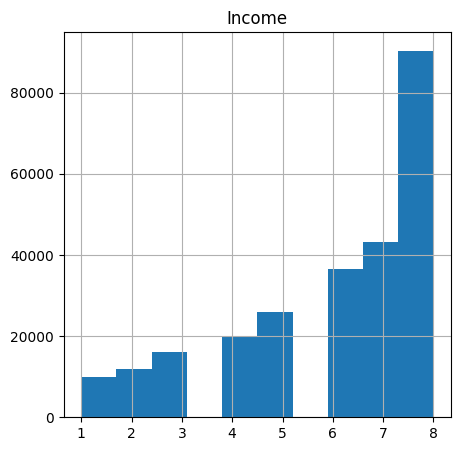

In [2]:
relative_path = "src\diabetes.csv"
absolute_path = os.path.join(os.getcwd(), relative_path)
with open(absolute_path, "r") as file:
    df = pd.read_csv(absolute_path)
# print(absolute_path)

print("Dataset shape:")
print(df.shape)
df.isnull().sum()
print("\nFrequency of each label value:")
print(df.Diabetes_012.value_counts())
print("\nDistribution of the target:")
print(df.Diabetes_012.value_counts(normalize=1))
print("\nFeatures:")
print(df.columns)
df.Diabetes_012.replace(2.0, 1.0, inplace=True)
print(df.Diabetes_012.value_counts(normalize=1))
df.columns = df.columns.str.replace(" ", "")
df.drop(
    ["Fruits", "Veggies", "NoDocbcCost",'AnyHealthcare','Smoker','Stroke'], axis=1, inplace=True
)

print(df.shape)
# df.hist(column="BMI", figsize=(5, 5))

bmi_scaler = StandardScaler()
cols_to_scale = ["BMI"]
bmi_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = bmi_scaler.transform(df[cols_to_scale])
# fig = df.hist(column="BMI", figsize=(5, 5))
# df.hist(column="GenHlth", figsize=(5, 5))

gh_scaler = StandardScaler()
cols_to_scale = ["GenHlth"]
gh_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = gh_scaler.transform(df[cols_to_scale])
# df.hist(column="GenHlth", figsize=(5, 5))
# df.hist(column="MentHlth", figsize=(5, 5))

ment_scaler = MinMaxScaler()
cols_to_scale = ["MentHlth"]
ment_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = ment_scaler.transform(df[cols_to_scale])
# df.hist(column="MentHlth", figsize=(5, 5))
# df.hist(column="PhysHlth", figsize=(5, 5))

phys_scaler = MinMaxScaler()
cols_to_scale = ["PhysHlth"]
phys_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = phys_scaler.transform(df[cols_to_scale])
# df.hist(column="PhysHlth", figsize=(5, 5))
# df.hist(column="Age", figsize=(5, 5))

age_scaler = MinMaxScaler()
cols_to_scale = ["Age"]
age_scaler.fit(df[cols_to_scale])
df.loc[:, cols_to_scale] = age_scaler.transform(df[cols_to_scale])
# df.hist(column="Age", figsize=(5, 5))

import warnings
warnings.filterwarnings("ignore")
# df.hist(column="Income", figsize=(5, 5))

income_cat_to_avg_map = {
    1: 5,
    2: 12.5,
    3: 17.5,
    4: 22.5,
    5: 30.0,
    6: 42.5,
    7: 62.5,
    8: 75,
}
# df = df.assign(Income=X.Income.map(income_cat_to_avg_map))

df.hist(column="Income", figsize=(5, 5))
inc_scaler = MinMaxScaler()
cols_to_scale = ["Income"]
inc_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = inc_scaler.transform(df[cols_to_scale])
# df.hist(column="Income", figsize=(5, 5))
# df.hist(column="Education", figsize=(5, 5))

edu_scaler = MinMaxScaler()
cols_to_scale = ["Education"]
edu_scaler.fit(df[cols_to_scale])
df[cols_to_scale] = edu_scaler.transform(df[cols_to_scale])
# df.hist(column="Education", figsize=(5, 5))
# Sex!

df["Sex"].value_counts(normalize=True)
gender = df["Sex"]
gender = gender.values.reshape(-1, 1)
encoder = OneHotEncoder(categories="auto", sparse_output=False)
gender_encoded = encoder.fit_transform(gender)
print(gender_encoded)
gender_encoded_df = pd.DataFrame(
    gender_encoded, columns=encoder.get_feature_names_out(["gender"])
)

df.reset_index(drop=True, inplace=True)
gender_encoded_df.reset_index(drop=True, inplace=True)
df_encoded = pd.concat([df.drop("Sex", axis=1), gender_encoded_df], axis=1)
df_encoded
df_encoded.iloc[:, 0].value_counts(normalize=1)
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=df_encoded[["gender_0.0", "gender_1.0"]],
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")

smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

Restarted Python 3.11.3

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 19 - تجزیه و تحلیل ویژگی‌های مهم  </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در اجرای مدل زیر با ورود پارامترهای مناسب‌تر به نتایج متفاوتی دست پیدا می‌کنیم. در اینجا f1-score معادل با 76٪ شده است. در این آمار سن، چکاپ کلسترول، مصرف الکل، فشار خون بالا، ارزیابی سطح سلامت، شاخص توده بدنی و بالا بودن کلسترول بیشترین تاثیرگذاری را نمایش می‌دهند. به لحاظ تفسیری، یکی از نکات حائز اهمیت این است که مردها با مرتبه‌ی بالاتر، بیشتر از زن‌ها در معرض خطر ابتلا به دیابت هستند.
            </p>
            <p class="specialP"> با این حال در نهایت می‌توان گفت اگر عواملی که در اختیار فرد نیستند مانند سن و سطح سلامت عمومی نادیده 
            گرفته شود، عواملی مانند مصرف الکل زیاد، فشار خون بالا، کلسترول بالا و BMI بالا منجر به دیابت و پیشا دیابت می‌شوند. </p>
            <p class="markdown-container">مدل رگرسیون لجستیک با استفاده از جستجوی شبکه‌ای هایپرپارامترها اصلاح می کند. بهترین عملکرد مدل را در مجموعه تست ارزیابی می کند و بهترین هایپرپارامترها و f1-score را چاپ می کند. علاوه بر این، مهم ترین ویژگی ها را بر اساس ضرایب آنها شناسایی و چاپ می کند. این به درک اینکه کدام ویژگی بیشترین تأثیر را بر پیش‌بینی‌های مدل دارد کمک می‌کند.
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [3]:
logistic_reg = LogisticRegression(random_state=0)
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [ 0.1, 1.0, 3.0, 5.0, 10.0],
    "solver": ["saga"],
    "max_iter": [100, 200, 300],
    "fit_intercept": [True, False],
}

grid_search = GridSearchCV(
    estimator=logistic_reg,
    param_grid=param_grid,
    scoring="f1_weighted",  # Use F1-score as the scoring metric
    cv=5,
    refit=True,
)

grid_search.fit(X_train, y_train)
print("Best parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)
# The most significant features

coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Best parameters:  {'C': 0.1, 'fit_intercept': True, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
F1-score on test set:  0.7648332966441127
Feature: Age, Coefficient: 1.9933045714468152
Feature: CholCheck, Coefficient: 1.5912553867190136
Feature: HvyAlcoholConsump, Coefficient: -0.7726749535474277
Feature: HighBP, Coefficient: 0.6849751336217698
Feature: GenHlth, Coefficient: 0.6284549084189511
Feature: HighChol, Coefficient: 0.5801324859526361
Feature: BMI, Coefficient: 0.5040401048157106
Feature: Income, Coefficient: -0.39189277055136484
Feature: PhysHlth, Coefficient: -0.30284335172705
Feature: gender_0.0, Coefficient: -0.24906434367218175
Feature: HeartDiseaseorAttack, Coefficient: 0.20499959131449316
Feature: MentHlth, Coefficient: -0.14933633950774983
Feature: Education, Coefficient: -0.1433114112771516
Feature: DiffWalk, Coefficient: 0.09567031865660985
Feature: PhysActivity, Coefficient: -0.03683633693732939
Feature: gender_1.0, Coefficient: 0.0019918536254538103


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 20 - ماتریس سردرگمی </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در تصویر حرارتی زیر بلوک‌هایی که به رنگ روشن هستند، مقادیری را نشان می‌دهند که ما به درستی بدست آورده‌ایم و در مقابل بلوک‌هایی که به رنگ تیره هستند محاسبات اشتباه ما (خطای نوع اول) هستند.
            در ردیف ۰ نشان می‌دهد افراد سالم به میزان 73٪ درست تشخیص داده شده و در ردیف ۱ افراد پیش دیابتی و مبتلا به دیابت به میزان 24٪ محاسبات اشتباه و 76٪ درصد محاسبات درستی داشته‌ایم.
            بنابراین افرادی که واقعا سالم هستند و ما نیز همین پیش‌بینی را داشته‌ایم 73٪، افرادی که سالم نبوده‌اند و ما به اشتباه پیش بینی سالم بودن از آن‌ها داشته‌ایم 27٪، افرادی که مبتلا به دیابت هستند اما تشخیص عدم دیابت داده‌ایم 24٪ درصد و فردی که طبق پیش بینی ما دیابت داشته و در واقعیت نیز مبتلا به دیابت بوده 76٪ میزان درستی تشخیص ما بوده است.
            <p class="specialP">از این نمودار می‌توان نتیجه گرفت (با توجه به overfit بودن آن) تشخیص ما در پیدا کردن افراد مبتلا به دیابت با آمار بالای 70٪، قابل قبول و خوب می‌باشد. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

              precision    recall  f1-score   support

         0.0       0.94      0.73      0.82     42754
         1.0       0.34      0.76      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.65     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.72533564 0.27466436]
 [0.23841143 0.76158857]]


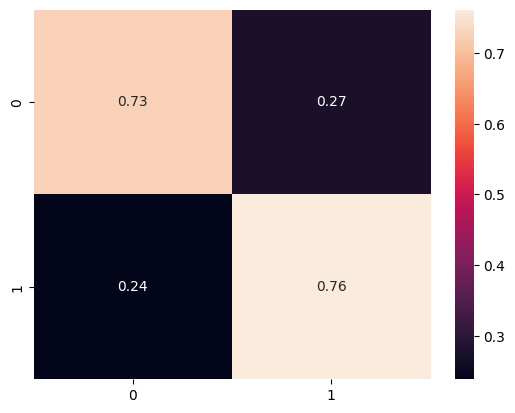

In [6]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 21 - اجرای مدل بر روی کل داده‌ها </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در این قسمت مشابه کد بالا اما بدون در نظر گرفتن train-test-split و اعمال کل داده، محاسبات را مجددا انجام داده‌ایم. نتیجه‌ای که به دست می‌آید نشان از سازگاری آن دارد و مشابه نتیجه قبلی که به دست آوردیم می‌باشد.
            <p class="specialP">
            نکته حائز اهمیت این است که داده اصلی ما بالانس نمی‌باشد. (stmote را روی داده train اعمال کردیم)، این یعنی مدل ما به خوبی یاد گرفته که از روی داده‌ی بالانس شده و با همان دقت یک داده بالانس نشده را پیش‌بینی کند. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

The accuracy of prediction on the whole imbalanced binary dataset:0.7631168374949716

The confusion matrix:

[[0.72340117 0.27659883]
 [0.24066338 0.75933662]]


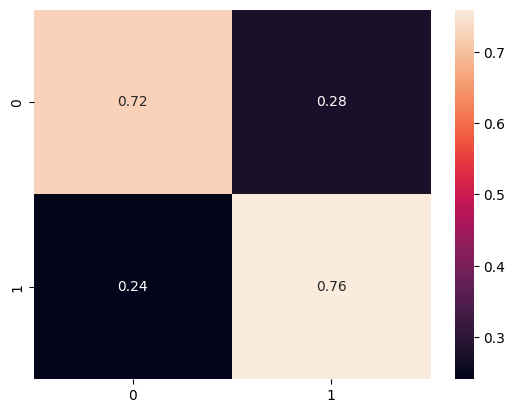

In [12]:
y_pred_all = best_model.predict(X)
print(f'The accuracy of prediction on the whole imbalanced binary dataset:{f1_score(y,y_pred_all,average="weighted")}\n')
print('The confusion matrix:\n')
conf_mat = confusion_matrix(y, y_pred_all, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> SGDClassifier مرحله 22 - استفاده از مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             مدل SGDClassifier یک مدل کلاسیفیکیشن خطی (linear_model) می‌باشد. نکته جالب توجه در این مدل این است که می‌تواند داده ما را حدودا در 30 ثانیه کلاسیفای کند! 
            در قسمت جستجوی تصادفی در داخل کد ما، با استفاده از تابع RandomizedSearchCV، داده‌های ما را بصورت تصادفی محاسبه می‌کند. این تابع برای پیدا کردن هایپرپارامتر مقادیر آلفا را به صورت تصادفی از توزیع یونیفورم پیدا می‌کند. 
            <p class="specialP">
            نکته بسیار جالب این است که الگوریم این مدل با دقت 76٪ درصد و در 33 ثانیه محاسبات را انجام و نتیجه را ارائه داد! </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [17]:
sgd = SGDClassifier()

param_dist = {
    'loss':['log', 'modified_huber'],
    'penalty': ['l1', 'l2'],
    'alpha': np.random.uniform(0, 0.01, 5),
    'learning_rate': ['constant', 'optimal'],
    'eta0': np.random.uniform(0, 0.1, 5),
    'max_iter': [100,200,300]
}
random_search = RandomizedSearchCV(
    sgd,
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    random_state=42
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'penalty': 'l1', 'max_iter': 200, 'loss': 'modified_huber', 'learning_rate': 'optimal', 'eta0': 0.04713087653177746, 'alpha': 0.003950701583561241}
F1-score on test set:  0.7601246185939267


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> SGD مرحله ۲۳ - آنالیز مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             این قسمت از کد ضرایب ویژگی ها را در بهترین مدل طبقه بندی کننده SGD محاسبه و نمایش می دهد. سپس ویژگی ها را بر اساس مقدار مطلق ضرایب آنها مرتب می کند و چاپ می کند. این شبیه کاری است که قبلاً با مدل رگرسیون لجستیک انجام دادیم. این قطعه کد می‌تواند بینش‌هایی در مورد اینکه کدام ویژگی‌ها در پیش‌بینی‌های مدل SGD بیشترین تأثیر را دارند، ارائه دهد.
            مجددا در اینجا ملاحظه می‌شود که مرتبه مردها بالاتر از زن‌ها قرار گرفته است. بدین معنی که مردها بیشتر از زن‌ها در معرض بیماری دیابت هستند. بنابراین می‌توان نتیجه گرفت که نوع جنسبت در ابتلای به این بیماری مهم است. همچنین از مقادیر اثرگذار دیگر در این خروجی می‌توان به چکاب کلسترول، فشار خون بالا، مصرف الکل، سلامت عمومی فرد و داشتن کلسترول بالا اشاره کرد و در مقابل سلامت روان، بیمه درمانی، آسیب‌های جسمی اخیر و سکته از اهمیت کمتری برخوردار می‌باشند. <p class="specialP"> نکته مهم این است که در این گزارش نمی‌توان اینطور برداشت کرد که اعداد مثب‌تر بیشتر هستند و اعدادی که به سمت منفی سیر می‌کنند کمتر هستند زیرا که این مقادیر به صورت Absolut هستند، در واقع این تابع بصورت خطی عمل می‌کند (به صورت Correlation عمل نمی‌کند) و چنین برداشتی اشتباه است. 
             </p>
             </p>
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [18]:
coefficients = best_model.coef_[0]
feature_names = list(X.columns)
feature_coefficients = list(zip(feature_names, coefficients))
sorted_feature_coefficients = sorted(
    feature_coefficients, key=lambda x: abs(x[1]), reverse=True
)

for feature, coefficient in sorted_feature_coefficients:
    print(f"Feature: {feature}, Coefficient: {coefficient}")

Feature: Age, Coefficient: 0.7215237662678236
Feature: CholCheck, Coefficient: 0.35675647074128725
Feature: HighBP, Coefficient: 0.29743124768851387
Feature: HvyAlcoholConsump, Coefficient: -0.2639797090910214
Feature: GenHlth, Coefficient: 0.2554003232616745
Feature: HighChol, Coefficient: 0.21795104465704565
Feature: BMI, Coefficient: 0.17744051541242903
Feature: PhysHlth, Coefficient: -0.1067393421179176
Feature: HeartDiseaseorAttack, Coefficient: 0.07199926856566968
Feature: gender_0.0, Coefficient: -0.0694258269085132
Feature: DiffWalk, Coefficient: 0.04695692362904113
Feature: Smoker, Coefficient: 0.0
Feature: Stroke, Coefficient: 0.0
Feature: PhysActivity, Coefficient: 0.0
Feature: AnyHealthcare, Coefficient: 0.0
Feature: MentHlth, Coefficient: 0.0
Feature: gender_1.0, Coefficient: 0.0


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله 24 - رسم ماتریکس سردرگمی داده </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در اینجا مجددا مشاهده می‌کنیم که مدل ما overfit است. با توجه به بالانس بودن داده‌ها، اختلاف آمار زیاد نمی‌باشد.
            <p class="specialP">
            این که کد ما بینش‌های دقیقی را درباره عملکرد مدل دسته‌بندی کننده SGD روی مجموعه آزمایشی ارائه می‌دهد. ابتدا گزارش دسته‌بندی را که شامل دقت، بازخوانی، - score F1 و حمایت برای هر کلاس است را نمایش می‌دهد. سپس این ماتریس، اشتباهات نرمال‌شده را به صورت عددی و به عنوان یک تصویر نمایشی هیت‌مپ نمایش می‌دهد. این اطلاعات به ما کمک می‌کند تا درک کنیم که مدل ما چقدر خوب عمل می‌کند و در کجا ممکن است خطاهایی داشته باشد. </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

              precision    recall  f1-score   support

         0.0       0.94      0.72      0.81     42754
         1.0       0.34      0.77      0.47      7982

    accuracy                           0.73     50736
   macro avg       0.64      0.74      0.64     50736
weighted avg       0.85      0.73      0.76     50736


The confusion matrix:

[[0.71726622 0.28273378]
 [0.23277374 0.76722626]]


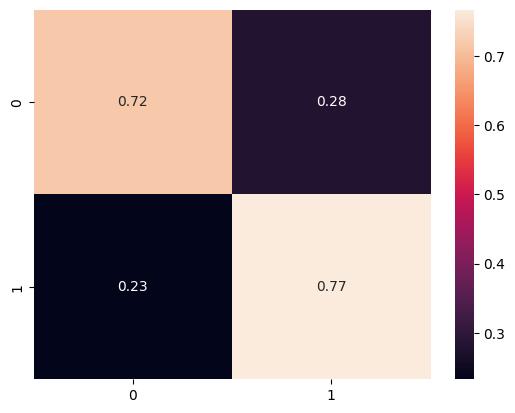

In [19]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> XGboost مرحله 25 -آنالیز مدل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             مدل XGBoost یک الگوریتم یادگیری ماشین مبتنی بر درخت تصمیم‌گیری است که به طور خاص برای مسائل دسته‌بندی و رگرسیون طراحی شده است. نام XGBoost مخفف "eXtreme Gradient Boosting" است که نشان‌دهنده استفاده از روش تقویت گرادیان با توابع هزینه‌ی گرادیانی ویژه است.
            در XGBoost، مدل تشکیل شده از مجموعه‌ای از درخت‌های تصمیم‌گیری ضعیف است، که به صورت ترتیبی ساخته می‌شوند و با توجه به خطای پیش‌بینی‌های قبلی بهبود می‌یابند. این بهبود به وسیله‌ی ترکیب پیش‌بینی‌های چند درخت و سعی در کاهش خطاها به حداقل ممکن انجام می‌شود. از تکنیک‌هایی مانند تغییر عمق درخت‌ها، تعیین وزن به داده‌ها و کاهش افتراق‌های خطا برای افزایش عملکرد و عمومیت مدل استفاده می‌شود.
            XGBoost از تکنیک‌هایی مانند تخمین تابع هزینه‌ی میانگین مربعات (Least Squares)، تابع هزینه‌ی لگاریتمی (Log Loss) و سایر توابع هزینه‌های سفارشی پشتیبانی می‌کند. همچنین، قادر به مدیریت مسائل دسته‌بندی چندکلاسه، انتخاب ویژگی‌ها، کاهش افتراق‌های اضافی و رفتارهای بسیاری دیگر است.
            به عنوان یک الگوریتم محبوب و قوی، XGBoost اغلب در مسابقات مختلف یادگیری ماشین با عملکرد برتر حضور داشته و در بسیاری از برنامه‌های عملی و تجاری مورد استفاده قرار می‌گیرد.
            <p class="specialP">
            در کد زیر (مانند مرحله ۲۲) با استفاده از روش RandomizedSearchCV نتیجه خروجی را می‌بینیم. 81٪ عددی هست که این مدل به ما می‌دهد و ما حدس می‌زنیم که این آمار overfit باشد، با این حال ما برای اطمینان بیشتر یک نمودار رسم ‌میکنیم (feature_importances_sorted) تا با استفاده از آن از نتایج حاصل شده اطلاعات بیشتری به دست بیاوریم. نتیجه حاصله در نمودار هیت‌مپ به ما می‌گوید که بیشتر افراد سالم شناسایی شده‌اند و با این اوصاف این مدل نتیجه خوشایندی به ما نمی‌دهد. (71٪ درصد افرادی که دیابتی تشخیص داده شده‌اند در واقع دیابت نداشته‌اند و سالم بوده‌اند در عوض تنها 29٪ از افرادی که دچار بیماری دیابت بوده‌اند را شناسایی کرده است) </p>
             </p>            
        </th>
    </tr>
</table>

</br>
<span dir="rtl" align="center" style="color: #2E86C1">
<p><b> 👇 در قطعه کد زیر آن را مشاهده می‌کنید 👇 </b></p>

In [39]:
xgb_classifier = XGBClassifier()
param_dist = {
    'n_estimators': np.random.randint(100, 1000, 4),  
    'max_depth': np.random.randint(1, 20, 5), 
    'learning_rate': np.random.uniform(0.01, 0.1, 4), 
    'subsample': np.random.uniform(0.5, 1.0, 4), 
    'colsample_bytree': np.random.uniform(0.5, 1.0, 4),  
    'gamma': np.random.uniform(0, 5, 4)  
}



# Create an instance of RandomizedSearchCV
random_search = RandomizedSearchCV(
    xgb_classifier,
    param_distributions=param_dist,
    n_iter=5,
    cv=5,
    scoring=make_scorer(f1_score),
    random_state=42
)


# Fit the random search to our data
random_search.fit(X_train, y_train)
print("Best parameters: ", random_search.best_params_)
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average="weighted")
print("F1-score on test set: ", f1)

Best parameters:  {'subsample': 0.826642923985935, 'n_estimators': 863, 'max_depth': 13, 'learning_rate': 0.05828295439053702, 'gamma': 1.0100627358208807, 'colsample_bytree': 0.7602590225838985}
F1-score on test set:  0.8188644044054907


In [47]:
#The code snippet we've provided prints the feature importances of the best XGBoost classifier model.
print(best_model.feature_importances_)

[0.23124814 0.05107835 0.06613772 0.06672846 0.01732144 0.01795353
 0.02134062 0.0170325  0.04610254 0.02036279 0.11090457 0.03746978
 0.05152547 0.02039873 0.18665372 0.01876661 0.01897499]


In [48]:
importances = best_model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances_sorted = feature_importances.sort_values('Feature')

print(feature_importances_sorted)

                 Feature  Importance
14                   Age    0.186654
9          AnyHealthcare    0.020363
3                    BMI    0.066728
2              CholCheck    0.066138
13              DiffWalk    0.020399
10               GenHlth    0.110905
6   HeartDiseaseorAttack    0.021341
0                 HighBP    0.231248
1               HighChol    0.051078
8      HvyAlcoholConsump    0.046103
11              MentHlth    0.037470
7           PhysActivity    0.017033
12              PhysHlth    0.051525
4                 Smoker    0.017321
5                 Stroke    0.017954
15            gender_0.0    0.018767
16            gender_1.0    0.018975


              precision    recall  f1-score   support

         0.0       0.88      0.94      0.91     42754
         1.0       0.46      0.29      0.35      7982

    accuracy                           0.84     50736
   macro avg       0.67      0.61      0.63     50736
weighted avg       0.81      0.84      0.82     50736


The confusion matrix:

[[0.93717547 0.06282453]
 [0.7116011  0.2883989 ]]


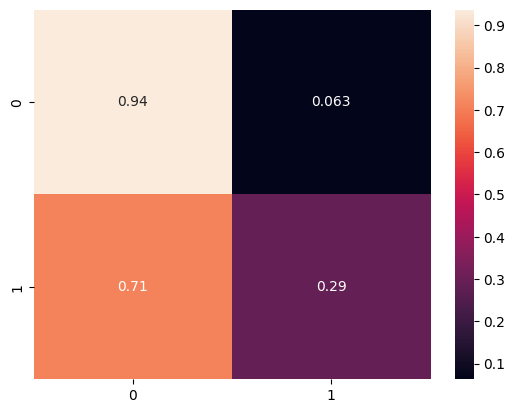

In [49]:
print(classification_report(y_test, y_pred))
print('\nThe confusion matrix:\n')
conf_mat = confusion_matrix(y_test, y_pred, normalize='true')
print(conf_mat)
ax=sns.heatmap(conf_mat, annot=True)

In [23]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 220%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
    .specialP {
        font-family: B Yekan+;
        color: #F1C40F;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 0px 50px 0px 50px;
        line-height: 180%;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-title"> مرحله نهایی - بررسی اجمالی نحوه عملکرد تمامی مراحل </p>            
        </th>
    </tr>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             در این مرحله ما قصد داریم تمام مدل‌ها بصورت خام و دقت آن را بر اساس شاخص validation در کوتاه‌ترین زمان ممکن در کنار یکدیگر تست کنیم و بر اساس عملکرد آن‌ها مقایسه انجام دهیم. در مرحله اول قصد داشتیم دقت تست را بسنجیم اما چون منابع سخت افزاری کمی در اختیار داشتیم مجبور شدیم به سری train  و مجموعه validation اکتفا کنیم، بنابراین دقت بر روی مجموعه تست مانده است. در نهایت در دیتافریم خروجی این قطعه کد ملاحظه می‌کنیم که Random Forest روی داده validation (ستون val_accuracy)بهترین عملکرد را دارد. در ادامه Gradient Boosting، Decision Tree و Logistic Regression در رتبه‌های بعدی عملکرد بهتری را ارائه داده‌اند. 
             <p class="specialP">
             این کد، ارزیابی عملکرد مدل‌های یادگیری ماشین مختلف بر روی مجموعه داده با استفاده از اندازه‌گیرهای ارزیابی متنوع است. مدل‌ها شامل رگرسیون لجستیک، درخت تصمیم، جنگل تصادفی، همسایگان‌های نزدیک (KNN)، ماشین بردار پشتیبان (SVM)، نویس بیز و گرادیان بوستینگ می‌شوند. نتایج مرتب می‌شوند تا مدل با بیشترین دقت اعتبارسنجی شناسایی شود. این اطلاعات می‌تواند در انتخاب مدل با عملکرد برتر برای وظیفه خاص شما راهنمایی کند. </p>
             </p>            
        </th>
    </tr>
</table>

In [24]:
X = df_encoded.iloc[:, 1:]
y = df_encoded.iloc[:, 0]

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=1,
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train,
    y_train,
    test_size=0.2,
    random_state=1,
)
# X_train, X_val, y_train, y_val = train_test_split(
#     X_train, y_train, test_size=0.2, random_state=1
# )
# pd.Series(y_test).value_counts().plot(kind="bar")
smt = SMOTE(random_state=1)
X_train, y_train = smt.fit_resample(X_train, y_train)

def evaluate_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    df = pd.DataFrame({'train_accuracy': [accuracy_score(y_train, y_train_pred)],
                        'train_precision': [precision_score(y_train, y_train_pred)],
                        'train_recall': [recall_score(y_train, y_train_pred)],
                        'train_f1': [f1_score(y_train, y_train_pred)],
                        'train_roc_auc': [roc_auc_score(y_train, y_train_pred)],
                        
                        'val_accuracy': [accuracy_score(y_val, y_val_pred)],
                        'val_precision': [precision_score(y_val, y_val_pred)],
                        'val_recall': [recall_score(y_val, y_val_pred)],
                        'val_f1': [f1_score(y_val, y_val_pred)],
                        'val_roc_auc': [roc_auc_score(y_val, y_val_pred)]})
    return df


models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# iterate through the dictionary and evaluate each model
results_l = []
for name, model in models.items():
    model_results = evaluate_model(model, X_train, y_train, X_val, y_val)
    model_results['model'] = name
    results_l.append(model_results)

# concatenate the results
results = pd.concat(results_l, axis=0).reset_index(drop=True)

results.sort_values(by='val_accuracy', ascending=False)


,train_accuracy,train_precision,train_recall,train_f1,train_roc_auc,val_accuracy,val_precision,val_recall,val_f1,val_roc_auc,model
2,0.996659,0.998306,0.995007,0.996654,0.996659,0.831654,0.461132,0.323148,0.380002,0.625704,Random Forest
6,0.874905,0.885834,0.860742,0.873108,0.874905,0.823795,0.451375,0.481327,0.465870,0.685092,Gradient Boosting
1,0.996663,0.999449,0.993874,0.996654,0.996663,0.775013,0.316952,0.354321,0.334596,0.604628,Decision Tree
0,0.750782,0.738342,0.776879,0.757121,0.750782,0.732464,0.345908,0.758488,0.475132,0.743004,Logistic Regression
4,0.767106,0.738561,0.826932,0.780252,0.767106,0.724039,0.340819,0.779938,0.474354,0.746679,SVM
3,0.887679,0.829971,0.975124,0.896711,0.887679,0.710759,0.301719,0.617593,0.405389,0.673026,KNN
5,0.727452,0.702080,0.790228,0.743551,0.727452,0.685900,0.308017,0.776080,0.441005,0.722424,Naive Bayes


<style>
    .markdown-title {
        font-family: B Yekan+;
        color: #BA4A00;
        font-weight: 1500;
        font-size: 300%;
        text-align: center;
        padding: 40px 0px 0px 5px      
    }
    .markdown-container {
        font-family: B Yekan+;
        color: #27AE60;
        font-weight: 1500;
        direction: rtl;
        text-align: justify;
        margin: 40px 50px 0px 50px;
        line-height: 180%;
    }
    .table {
        align: center;
        border: 0px;
        width: 100%;
        text-align: center;
    }
</style>

<hr><hr><hr>
<table>
    <tr>
        <th class="table">            
            <p class = "markdown-container">
             با تشکر از اساتید دوره، استاد مجیدی و استاد کدیور که در طول دوره دلسوزانه راهنمای ما برای یادگیری و انجام هرچه بهتر این پروژه بودند. این گزارش با تلاش آقای تقویان فر و صالح عابدی‌نژاد تهیه و تکمیل شد که امید است مورد توجه اساتید محترم قرار بگیرد.
             </p>            
        </th>
    </tr>
</table>